# Problems:

## 1.      Given the dataset, once it is loaded, what basic data analysis can you perform, such as checking for missing values or obtaining summary statistics? Please show it.

## Solution:
   ###### 1.1 Load the data, then check for what elements are present.
   ###### 1.2 Check if there's any data missing
   ###### 1.3 Remove any unneeded columns
   ###### 1.4 Add helper columns if needed
   ###### 1.5 Reorganize data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cookieData = pd.read_excel('PCC Cookie Company Financials.xlsx')
cookieData


,Country,Product,Units Sold,Revenue per cookie,Cost per cookie,Revenue,Cost,Profit,Date,Month Number,Month Name,Year
0,Canada,Chocolate Chip,292.0,5,2.00,1460.0,584.00,876.00,2019-02-01,2,February,2019
1,Mexico,Chocolate Chip,974.0,5,2.00,4870.0,1948.00,2922.00,2019-02-01,2,February,2019
2,Canada,Chocolate Chip,2518.0,5,2.00,12590.0,5036.00,7554.00,2019-06-01,6,June,2019
3,Germany,Chocolate Chip,1006.0,5,2.00,5030.0,2012.00,3018.00,2019-06-01,6,June,2019
4,Germany,Chocolate Chip,367.0,5,2.00,1835.0,734.00,1101.00,2019-07-01,7,July,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
695,France,White Chocolate Macadamia Nut,2826.0,6,2.75,16956.0,7771.50,9184.50,2019-05-01,5,May,2019
696,France,White Chocolate Macadamia Nut,663.0,6,2.75,3978.0,1823.25,2154.75,2019-09-01,9,September,2019
697,United States,White Chocolate Macadamia Nut,2574.0,6,2.75,15444.0,7078.50,8365.50,2018-11-01,11,November,2018
698,United States,White Chocolate Macadamia Nut,2438.0,6,2.75,14628.0,6704.50,7923.50,2018-12-01,12,December,2018


### checking overall document content; together it identifies if there are null cells

In [2]:
cookieData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Country             700 non-null    object        
 1   Product             700 non-null    object        
 2   Units Sold          700 non-null    float64       
 3   Revenue per cookie  700 non-null    int64         
 4   Cost per cookie     700 non-null    float64       
 5   Revenue             700 non-null    float64       
 6   Cost                700 non-null    float64       
 7   Profit              700 non-null    float64       
 8   Date                700 non-null    datetime64[ns]
 9   Month Number        700 non-null    int64         
 10  Month Name          700 non-null    object        
 11  Year                700 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 65.8+ KB


In [3]:
duplicate_values = cookieData.duplicated()
print(sum(duplicate_values==True))

0


#### Adding another column to identify quarterly performance

In [4]:
cookieData['quarter'] = pd.PeriodIndex(cookieData.Date, freq='Q')
cookieData

,Country,Product,Units Sold,Revenue per cookie,Cost per cookie,Revenue,Cost,Profit,Date,Month Number,Month Name,Year,quarter
0,Canada,Chocolate Chip,292.0,5,2.00,1460.0,584.00,876.00,2019-02-01,2,February,2019,2019Q1
1,Mexico,Chocolate Chip,974.0,5,2.00,4870.0,1948.00,2922.00,2019-02-01,2,February,2019,2019Q1
2,Canada,Chocolate Chip,2518.0,5,2.00,12590.0,5036.00,7554.00,2019-06-01,6,June,2019,2019Q2
3,Germany,Chocolate Chip,1006.0,5,2.00,5030.0,2012.00,3018.00,2019-06-01,6,June,2019,2019Q2
4,Germany,Chocolate Chip,367.0,5,2.00,1835.0,734.00,1101.00,2019-07-01,7,July,2019,2019Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,France,White Chocolate Macadamia Nut,2826.0,6,2.75,16956.0,7771.50,9184.50,2019-05-01,5,May,2019,2019Q2
696,France,White Chocolate Macadamia Nut,663.0,6,2.75,3978.0,1823.25,2154.75,2019-09-01,9,September,2019,2019Q3
697,United States,White Chocolate Macadamia Nut,2574.0,6,2.75,15444.0,7078.50,8365.50,2018-11-01,11,November,2018,2018Q4
698,United States,White Chocolate Macadamia Nut,2438.0,6,2.75,14628.0,6704.50,7923.50,2018-12-01,12,December,2018,2018Q4


### Overview/Summary of Data
#### Overall product sales performance

In [5]:
cookiesSold=cookieData.groupby(['Product'],as_index=False).sum(['Units Sold']).drop(columns=['Revenue per cookie','Cost per cookie','Month Number','Year'])
cookiesSold

,Product,Units Sold,Revenue,Cost,Profit
0,Chocolate Chip,338239.5,1691197.5,676479.000,1014718.500
1,Fortune Cookie,154198.0,154198.0,30839.600,123358.400
2,Oatmeal Raisin,155315.0,776575.0,341693.000,434882.000
3,Snickerdoodle,146846.0,587384.0,220269.000,367115.000
4,Sugar,168783.0,506349.0,210978.750,295370.250
5,White Chocolate Macadamia Nut,162424.5,974547.0,446667.375,527879.625


#### Ranking of country sales performance by product

In [6]:
soldPerCountry=cookieData.groupby(['Product', 'Country'],as_index=False).sum(['Units Sold']).sort_values(['Product', 'Profit'],ascending = False).drop(columns=['Month Number','Year','Revenue per cookie','Cost per cookie'])
soldPerCountry

,Product,Country,Units Sold,Revenue,Cost,Profit
26,White Chocolate Macadamia Nut,France,36609.5,219657.0,100676.125,118980.875
29,White Chocolate Macadamia Nut,United States,35761.0,214566.0,98342.750,116223.250
25,White Chocolate Macadamia Nut,Canada,32464.0,194784.0,89276.000,105508.000
27,White Chocolate Macadamia Nut,Germany,31050.0,186300.0,85387.500,100912.500
28,White Chocolate Macadamia Nut,Mexico,26540.0,159240.0,72985.000,86255.000
20,Sugar,Canada,41248.5,123745.5,51560.625,72184.875
21,Sugar,France,35774.5,107323.5,44718.125,62605.375
24,Sugar,United States,34500.0,103500.0,43125.000,60375.000
22,Sugar,Germany,31131.0,93393.0,38913.750,54479.250
23,Sugar,Mexico,26129.0,78387.0,32661.250,45725.750


#### Top Performing Country

In [7]:
rankCountry=soldPerCountry.groupby(['Country'],as_index=False).sum().sort_values(['Profit'],ascending = False).drop(columns=['Product'])
rankCountry

,Country,Units Sold,Revenue,Cost,Profit
0,Canada,247428.5,1026351.5,420033.725,606317.775
1,France,240931.0,1010531.5,415473.250,595058.250
4,United States,232627.5,977630.5,403483.150,574147.350
3,Mexico,203325.0,836667.0,341868.250,494798.750
2,Germany,201494.0,839070.0,346068.350,493001.650


#### Top performing Country by Product

In [8]:
maxIdentifier=soldPerCountry.groupby('Product')['Units Sold'].idxmax()
topCountryPerProduct=soldPerCountry.loc[maxIdentifier]
topCountryPerProduct

,Product,Country,Units Sold,Revenue,Cost,Profit
0,Chocolate Chip,Canada,78191.5,390957.5,156383.000,234574.500
8,Fortune Cookie,Mexico,31754.0,31754.0,6350.800,25403.200
14,Oatmeal Raisin,United States,35469.5,177347.5,78032.900,99314.600
15,Snickerdoodle,Canada,34804.0,139216.0,52206.000,87010.000
20,Sugar,Canada,41248.5,123745.5,51560.625,72184.875
26,White Chocolate Macadamia Nut,France,36609.5,219657.0,100676.125,118980.875


#### Quarterly Performance

In [9]:
quarterPerformance=cookieData.groupby(['Year', 'quarter','Country'],as_index=False).sum(['Units Sold']).sort_values(['quarter','Profit'],ascending = False).drop(columns=['Month Number','Revenue per cookie','Cost per cookie'])
quarterPerformance

,Year,quarter,Country,Units Sold,Revenue,Cost,Profit
25,2019,2019Q4,Canada,67019.0,275710.0,112677.950,163032.050
26,2019,2019Q4,France,55730.0,220308.0,89315.600,130992.400
29,2019,2019Q4,United States,50681.0,207425.0,85121.950,122303.050
28,2019,2019Q4,Mexico,47260.0,192758.0,77920.800,114837.200
27,2019,2019Q4,Germany,42778.0,175326.0,72243.850,103082.150
24,2019,2019Q3,United States,45721.5,194717.5,81511.425,113206.075
21,2019,2019Q3,France,41411.0,181011.0,74987.425,106023.575
20,2019,2019Q3,Canada,35453.5,149122.0,60928.100,88193.900
22,2019,2019Q3,Germany,34172.0,145697.0,59499.650,86197.350
23,2019,2019Q3,Mexico,30576.0,126129.0,51507.350,74621.650


#### Ranking of Country by Quarterly Performance

In [10]:
maxQCountry=quarterPerformance.groupby('quarter')['Units Sold'].idxmax()
topCountryQuarterly=quarterPerformance.loc[maxQCountry]
topCountryQuarterly

,Year,quarter,Country,Units Sold,Revenue,Cost,Profit
0,2018,2018Q3,Canada,14548.0,66592.0,27648.050,38943.950
5,2018,2018Q4,Canada,47743.0,196525.0,79953.450,116571.550
11,2019,2019Q1,France,43837.5,195697.5,81196.325,114501.175
19,2019,2019Q2,United States,53001.5,220111.0,89598.675,130512.325
24,2019,2019Q3,United States,45721.5,194717.5,81511.425,113206.075
25,2019,2019Q4,Canada,67019.0,275710.0,112677.950,163032.050


## 2.      How can you use Matplotlib to visualize trends in your data, such as monthly sales and comparisons between different types of cookies?
    
## Solution:
##### Using reorganized data, reimagine using visuals such as line/bar/pie charts.

In [11]:
cookieData['Country'].unique()

array(['Canada', 'Mexico', 'Germany', 'France', 'United States'],
      dtype=object)

In [12]:
rankCountry

,Country,Units Sold,Revenue,Cost,Profit
0,Canada,247428.5,1026351.5,420033.725,606317.775
1,France,240931.0,1010531.5,415473.250,595058.250
4,United States,232627.5,977630.5,403483.150,574147.350
3,Mexico,203325.0,836667.0,341868.250,494798.750
2,Germany,201494.0,839070.0,346068.350,493001.650


#### Top Performing Country Plot ( Nested Bar Chart )

In [13]:
nameCountries = pd.array(rankCountry.Country)
nameCountries

<NumpyExtensionArray>
['Canada', 'France', 'United States', 'Mexico', 'Germany']
Length: 5, dtype: object

In [14]:
unitsSold = pd.array(rankCountry['Units Sold'])
unitsSold

<NumpyExtensionArray>
[247428.5, 240931.0, 232627.5, 203325.0, 201494.0]
Length: 5, dtype: float64

In [15]:
dateQuarters= cookieData['quarter'].unique()
dateQuarters

<PeriodArray>
['2019Q1', '2019Q2', '2019Q3', '2018Q3', '2019Q4', '2018Q4']
Length: 6, dtype: period[Q-DEC]

<Axes: title={'center': 'Overall Sales Performance'}, xlabel='Total no. of Units Sold 2018-2019'>

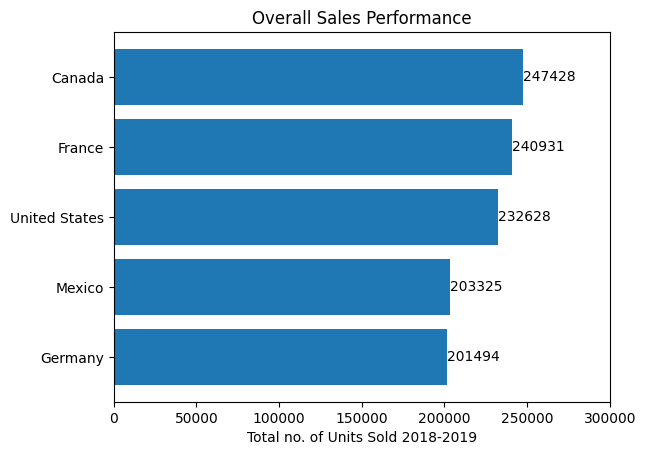

In [16]:
allSales, perC =plt.subplots()

# Example data
y_pos = np.arange(len(nameCountries))

perCHBars = perC.barh(y_pos, unitsSold, align='center')
perC.set_yticks(y_pos, labels=nameCountries)
perC.invert_yaxis()  # labels read top-to-bottom

perC.set_xlabel('Total no. of Units Sold 2018-2019')
perC.set_title('Overall Sales Performance')

perC.bar_label(perCHBars, fmt='%.f')
perC.set_xlim(right=300000)  # adjust xlim to fit labels

perC

#### Overall Product Sales ( Pie Chart )

In [17]:
cookiesSold

,Product,Units Sold,Revenue,Cost,Profit
0,Chocolate Chip,338239.5,1691197.5,676479.000,1014718.500
1,Fortune Cookie,154198.0,154198.0,30839.600,123358.400
2,Oatmeal Raisin,155315.0,776575.0,341693.000,434882.000
3,Snickerdoodle,146846.0,587384.0,220269.000,367115.000
4,Sugar,168783.0,506349.0,210978.750,295370.250
5,White Chocolate Macadamia Nut,162424.5,974547.0,446667.375,527879.625


In [18]:
cookieNames  = cookiesSold.Product
cookieNames

0                   Chocolate Chip
1                   Fortune Cookie
2                   Oatmeal Raisin
3                    Snickerdoodle
4                            Sugar
5    White Chocolate Macadamia Nut
Name: Product, dtype: object

In [21]:
cookieUnits = cookiesSold['Units Sold']
cookieUnits

0    338239.5
1    154198.0
2    155315.0
3    146846.0
4    168783.0
5    162424.5
Name: Units Sold, dtype: float64

<Axes: title={'center': 'Cookies Sold'}>

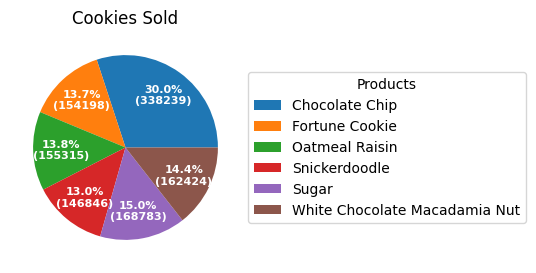

In [23]:
fig2, cookiesSales = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"


wedges, texts, autotexts = cookiesSales.pie(cookieUnits, autopct=lambda pct: func(pct, cookieUnits),
                                  textprops=dict(color='white'),pctdistance=0.7, labeldistance=1)
cookiesSales.legend(wedges, cookieNames,
          title="Products",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

cookiesSales.set_title("Cookies Sold")

cookiesSales

#### Historical Quarterly Sales Performance per Country (Line Chart)

In [24]:
quarterPerformance

,Year,quarter,Country,Units Sold,Revenue,Cost,Profit
25,2019,2019Q4,Canada,67019.0,275710.0,112677.950,163032.050
26,2019,2019Q4,France,55730.0,220308.0,89315.600,130992.400
29,2019,2019Q4,United States,50681.0,207425.0,85121.950,122303.050
28,2019,2019Q4,Mexico,47260.0,192758.0,77920.800,114837.200
27,2019,2019Q4,Germany,42778.0,175326.0,72243.850,103082.150
24,2019,2019Q3,United States,45721.5,194717.5,81511.425,113206.075
21,2019,2019Q3,France,41411.0,181011.0,74987.425,106023.575
20,2019,2019Q3,Canada,35453.5,149122.0,60928.100,88193.900
22,2019,2019Q3,Germany,34172.0,145697.0,59499.650,86197.350
23,2019,2019Q3,Mexico,30576.0,126129.0,51507.350,74621.650


In [25]:
quarterPerformance.columns.unique()

Index(['Year', 'quarter', 'Country', 'Units Sold', 'Revenue', 'Cost',
       'Profit'],
      dtype='object')

In [26]:
subData = quarterPerformance[['Country', 'Units Sold', 'Revenue', 'Cost', 'Profit','quarter']].sort_values(by="quarter")
subData.quarter = subData.quarter.astype("string")
subData

,Country,Units Sold,Revenue,Cost,Profit,quarter
3,Mexico,7709.0,32476.0,13131.900,19344.100,2018Q3
2,Germany,9640.0,36800.0,14856.950,21943.050,2018Q3
1,France,9491.0,40427.0,17173.900,23253.100,2018Q3
0,Canada,14548.0,66592.0,27648.050,38943.950,2018Q3
4,United States,9213.0,35781.0,14452.650,21328.350,2018Q3
9,United States,38267.0,165428.0,69437.800,95990.200,2018Q4
6,France,41835.0,170256.0,69465.050,100790.950,2018Q4
8,Mexico,41596.0,172280.0,70322.850,101957.150,2018Q4
7,Germany,44632.0,186584.0,77052.250,109531.750,2018Q4
5,Canada,47743.0,196525.0,79953.450,116571.550,2018Q4


In [27]:
subData.Country.unique()

array(['Mexico', 'Germany', 'France', 'Canada', 'United States'],
      dtype=object)

In [28]:
subCA = pd.DataFrame(subData[subData['Country']=='Canada'])
subMX = pd.DataFrame(subData[subData['Country']=='Mexico'])
subDE = pd.DataFrame(subData[subData['Country']=='Germany'])
subFR = pd.DataFrame(subData[subData['Country']=='France'])
subUS = pd.DataFrame(subData[subData['Country']=='United States'])

In [29]:
subCA

,Country,Units Sold,Revenue,Cost,Profit,quarter
0,Canada,14548.0,66592.0,27648.050,38943.950,2018Q3
5,Canada,47743.0,196525.0,79953.450,116571.550,2018Q4
10,Canada,34434.5,137755.0,55680.525,82074.475,2019Q1
15,Canada,48230.5,200647.5,83145.650,117501.850,2019Q2
20,Canada,35453.5,149122.0,60928.100,88193.900,2019Q3
25,Canada,67019.0,275710.0,112677.950,163032.050,2019Q4


<Axes: title={'center': 'Historical Quarterly Sales Per Country'}>

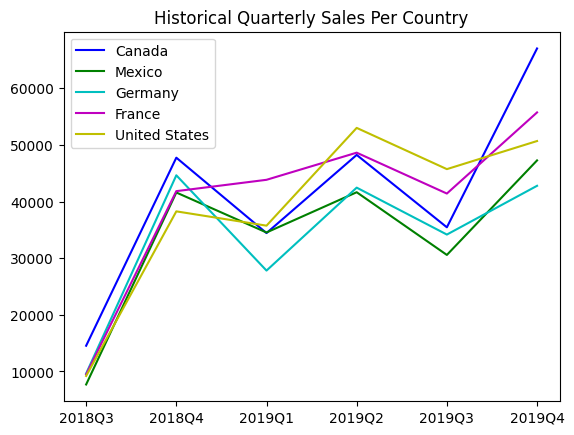

In [30]:
import matplotlib.dates as mdates
import matplotlib.units as munits

fig3, quarterPerf = plt.subplots()
# time = subCA
# x = np.arange(len(time))
# ax.plot(time, x)
quarterPerf.plot(subCA.quarter,subCA['Units Sold'], 'b-',subMX.quarter,subMX['Units Sold'], 'g-',subDE.quarter,subDE['Units Sold'], 'c-',subFR.quarter,subFR['Units Sold'], 'm-',subUS.quarter,subUS['Units Sold'], 'y-')

quarterPerf.legend(['Canada','Mexico','Germany','France','United States'])

quarterPerf.set_title("Historical Quarterly Sales Per Country")
quarterPerf

## 3.      What machine learning algorithm can you use to predict future profits in each country per month?
   
## Solution:

   ##### 3.1 Prepare data, rename values on columns
   ##### 3.2 Decision Tree is a better fit since the data depends on several factors

In [31]:
cookieData['Country'].unique()

array(['Canada', 'Mexico', 'Germany', 'France', 'United States'],
      dtype=object)

In [32]:
cookieData['Product'].unique()

array(['Chocolate Chip', 'Fortune Cookie', 'Oatmeal Raisin',
       'Snickerdoodle', 'Sugar', 'White Chocolate Macadamia Nut'],
      dtype=object)

In [33]:
# Set dictionary for data value replacement
columnsToRep={'Product':{'Chocolate Chip', 'Fortune Cookie', 'Oatmeal Raisin',
       'Snickerdoodle', 'Sugar', 'White Chocolate Macadamia Nut'},'Country':{'Mexico', 'Germany', 'France', 'Canada', 'United States'}}
valuesRep ={'Product':{0,1,2,3,4,5},'Country':{0,1,2,3,4}}

pd.set_option('future.no_silent_downcasting', True)

cookieDataV2 = cookieData.replace(to_replace = columnsToRep, value = valuesRep).drop(columns=['Month Name','Revenue per cookie','Cost per cookie','Year','quarter','Month Number'])
cookieDataV2['YearMonth']=cookieDataV2.Date.dt.strftime('%Y%m')
cookieDataV2


,Country,Product,Units Sold,Revenue,Cost,Profit,Date,YearMonth
0,1,3,292.0,1460.0,584.00,876.00,2019-02-01,201902
1,2,3,974.0,4870.0,1948.00,2922.00,2019-02-01,201902
2,1,3,2518.0,12590.0,5036.00,7554.00,2019-06-01,201906
3,0,3,1006.0,5030.0,2012.00,3018.00,2019-06-01,201906
4,0,3,367.0,1835.0,734.00,1101.00,2019-07-01,201907
...,...,...,...,...,...,...,...,...
695,3,5,2826.0,16956.0,7771.50,9184.50,2019-05-01,201905
696,3,5,663.0,3978.0,1823.25,2154.75,2019-09-01,201909
697,4,5,2574.0,15444.0,7078.50,8365.50,2018-11-01,201811
698,4,5,2438.0,14628.0,6704.50,7923.50,2018-12-01,201812


In [49]:
cookieDataV3 = cookieData.drop(columns=['Month Name','Revenue per cookie','Cost per cookie','Year','quarter','Month Number'])
cookieDataV3['YearMonth']=cookieDataV3.Date.dt.strftime('%Y%m')
cookieDataV3


,Country,Product,Units Sold,Revenue,Cost,Profit,Date,YearMonth
0,Canada,Chocolate Chip,292.0,1460.0,584.00,876.00,2019-02-01,201902
1,Mexico,Chocolate Chip,974.0,4870.0,1948.00,2922.00,2019-02-01,201902
2,Canada,Chocolate Chip,2518.0,12590.0,5036.00,7554.00,2019-06-01,201906
3,Germany,Chocolate Chip,1006.0,5030.0,2012.00,3018.00,2019-06-01,201906
4,Germany,Chocolate Chip,367.0,1835.0,734.00,1101.00,2019-07-01,201907
...,...,...,...,...,...,...,...,...
695,France,White Chocolate Macadamia Nut,2826.0,16956.0,7771.50,9184.50,2019-05-01,201905
696,France,White Chocolate Macadamia Nut,663.0,3978.0,1823.25,2154.75,2019-09-01,201909
697,United States,White Chocolate Macadamia Nut,2574.0,15444.0,7078.50,8365.50,2018-11-01,201811
698,United States,White Chocolate Macadamia Nut,2438.0,14628.0,6704.50,7923.50,2018-12-01,201812


#### Projected Profit

In [58]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


### Create a function that will set actual vs. projected profit according to country & product

In [81]:
def ProjectedProfit(countryName,productName,futureDate):
    dataCountry = pd.DataFrame(cookieDataV3[cookieDataV3['Country']==countryName])
    dataProduct = pd.DataFrame(dataCountry[dataCountry['Product']==productName].sort_values(by='YearMonth'))
    
    # Plot actual profits
    fig4, regPlot = plt.subplots(figsize=(15, 5))
    regPlot.scatter(dataProduct['YearMonth'],dataProduct['Profit'])
    
    # Linear regression model
    regData = LinearRegression()
    regData.fit(dataProduct[['YearMonth']],dataProduct[['Profit']])
    predictedData = regData.predict(dataProduct[['YearMonth']])

    # Setting timeline data for future prediction
    addYear = int(str(futureDate)[:4]) - 2019
    addMonth = int(str(futureDate)[:-2])
    
    addYearMonth =pd.DataFrame(columns=['YearMonth']) 
    yrStart = 1
    while yrStart < addYear:
        monStart = 1
        while monStart < 12:
            toYr = 2019+yrStart
            futYrMon = str(toYr)+str(monStart)+'01'
            addYearMonth = pd.concat([futYrMon], ignore_index=True)
            monStart = monStart + 1    
        yrStart =  yrStart + 1
    
    while yrStart == addYear:
        monStart = 1
        while monStart != addMonth:
            toYr = 2019+yrStart
            futYrMon = str(toYr)+'0'+str(monStart)+'01'
            addYearMonth = pd.concat([futYrMon], ignore_index=True)
            monStart = monStart + 1

    addFuturePredict = regData.predict(addYearMonth)
    regPlot.plot(addYearMonth, addFuturePredict, color='red')
    regPlot.plot(dataProduct['YearMonth'],predictedData, color='red')
    
    regPlotTitle = 'Actual vs. Projected Profit for '+ productName + ' sales in ' + countryName
    regPlot.set_title(regPlotTitle)
    regPlot.set_ylabel('Profit')
    regPlot.set_xlabel('Year-Month')
    regPlot.legend(['Actual','Projected'])

    print(preYear)
    return regPlot

In [85]:
def ProjectedProfit(countryName,productName,futureDate):
    dataCountry = pd.DataFrame(cookieDataV3[cookieDataV3['Country']==countryName])
    dataProduct = pd.DataFrame(dataCountry[dataCountry['Product']==productName].sort_values(by='YearMonth'))

    # Convert 'YearMonth' to datetime for improved plot clarity
    dataProduct['YearMonth'] = pd.to_datetime(dataProduct['YearMonth'].astype(str), format='%Y%m')
    
    # Convert YearMonth to timestamp (seconds since epoch)
    dataProduct['YearMonth_ts'] = dataProduct['YearMonth'].apply(lambda x: x.timestamp())
    
    # Plot actual profits
    fig4, regPlot = plt.subplots(figsize=(15, 10))
    regPlot.scatter(dataProduct['YearMonth'],dataProduct['Profit'], label="Actual")
    
    # Fit linear regression model
    regData = LinearRegression()
    regData.fit(dataProduct[['YearMonth_ts']], dataProduct[['Profit']])
    predictedData = regData.predict(dataProduct[['YearMonth_ts']])

    # Calculate future dates starting from January 2020
    futureStart = pd.to_datetime("2020-01-01")
    futureEnd = pd.to_datetime(str(futureDate), format='%Y%m')
    addYearMonth = pd.date_range(start=futureStart, end=futureEnd, freq='MS')
    
    # Convert future dates to timestamps for prediction
    addYearMonth_df = pd.DataFrame(addYearMonth, columns=['YearMonth'])
    addYearMonth_df['YearMonth_ts'] = addYearMonth_df['YearMonth'].apply(lambda x: x.timestamp())
    addFuturePredict = regData.predict(addYearMonth_df[['YearMonth_ts']])

    # Plot projected profits
    regPlot.plot(addYearMonth, addFuturePredict, color='red', label="Projected")
    regPlot.plot(dataProduct['YearMonth'], predictedData, color='green', label="Trendline")
    
    # Set title and labels
    regPlotTitle = f"Actual vs. Projected Profit for {productName} sales in {countryName}"
    regPlot.set_title(regPlotTitle)
    regPlot.set_ylabel("Profit")
    regPlot.set_xlabel("Year-Month")
    
    # Set date format and tick rotation for readability
    regPlot.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)
    regPlot.legend()
    
    return regPlot

In [105]:
from datetime import date
mm1=3
yy2=2022
xxx = date(yy2,mm1,1).strftime('%Y%m')

type(xxx)
xxx

'202203'

<Axes: title={'center': 'Actual vs. Projected Profit for Chocolate Chip sales in Canada'}, xlabel='Year-Month', ylabel='Profit'>

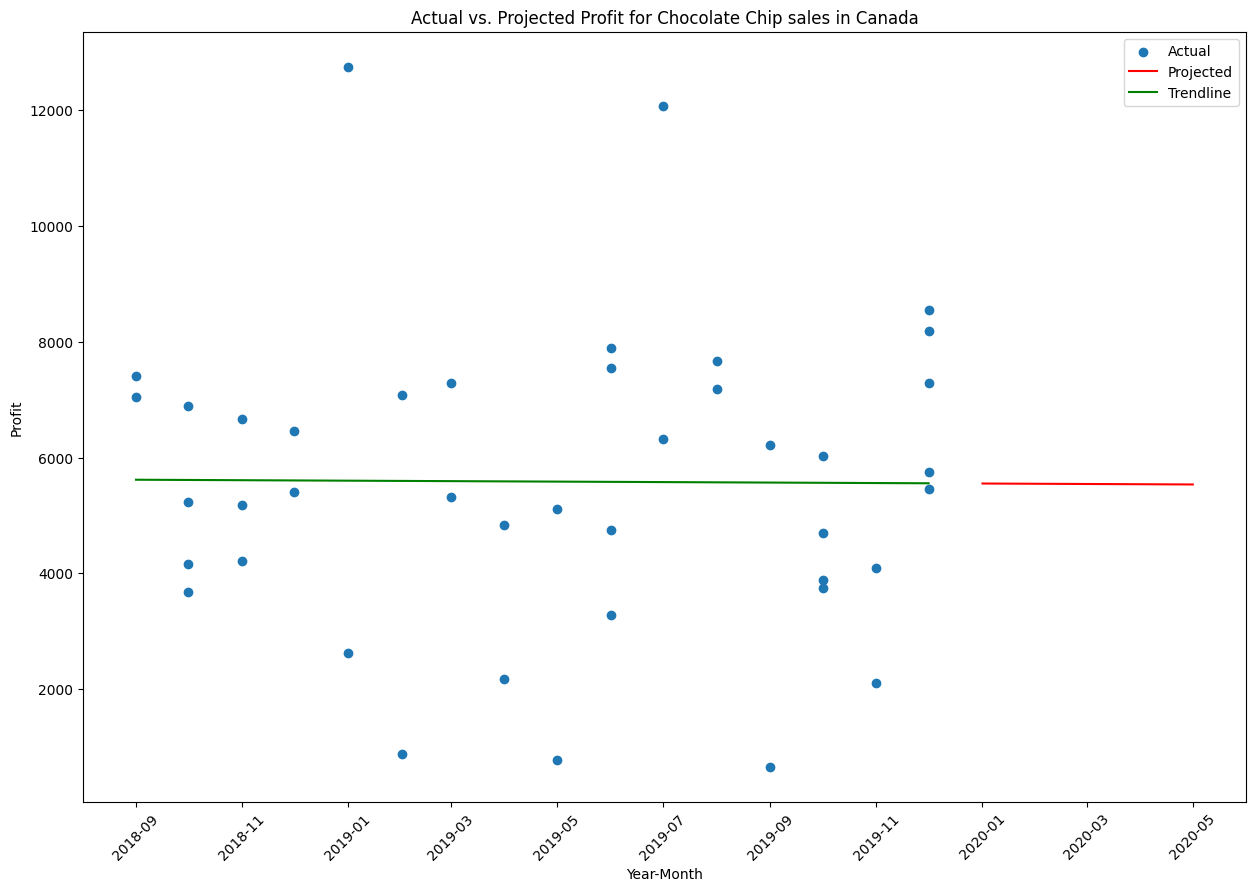

In [87]:
ProjectedProfit('Canada','Chocolate Chip',202005)